<a href="https://colab.research.google.com/github/aditipatil0711/SJSU_Masters_Assignments/blob/main/CMPE255_Data_Mining/Assignment5/Tabular_Diverse_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA on Tabular Diverse  Dataset

In this execution, we will do EDA Analysis on Audio Dataset:

The dataset we have used is : Covid 19 Dataset




In [1]:
import pandas as pd
import numpy as np

from google.colab import files
uploaded = files.upload()


# Load the dataset
covid_data = pd.read_csv('covid_19_data.csv')

# Display the first few rows to understand the structure
covid_data.head()

Saving covid_19_data.csv to covid_19_data.csv


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


## Data Preprocessing

In [2]:
# Descriptive statistics for numerical columns
numerical_stats = covid_data[['Confirmed', 'Deaths', 'Recovered']].describe()

# Extracting relevant statistics
numerical_summary = numerical_stats.loc[['mean', '50%', 'std', 'min', 'max']].transpose()
numerical_summary.rename(columns={'50%': 'median'}, inplace=True)

numerical_summary


,mean,median,std,min,max
Confirmed,85670.911559,10375.0,277551.604043,-302844.0,5863138.0
Deaths,2036.403268,192.0,6410.938048,-178.0,112385.0
Recovered,50420.286304,1751.0,201512.447838,-854405.0,6399531.0


In [3]:
# Descriptive statistics for categorical columns
categorical_cols = ['ObservationDate', 'Province/State', 'Country/Region', 'Last Update']
categorical_stats = covid_data[categorical_cols].describe(include=[np.object])

# Extracting relevant statistics
categorical_summary = categorical_stats.loc[['unique', 'top', 'freq']].transpose()

categorical_summary


<ipython-input-3-920f25fc7567>:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_stats = covid_data[categorical_cols].describe(include=[np.object])


,unique,top,freq
ObservationDate,494,05/29/2021,765
Province/State,737,Unknown,4123
Country/Region,229,Russia,30251
Last Update,1905,2021-04-02 15:13:53,239885


In [4]:
# Replace negative values in 'Confirmed', 'Deaths', and 'Recovered' columns with 0
cols_to_correct = ['Confirmed', 'Deaths', 'Recovered']
for col in cols_to_correct:
    covid_data[col] = covid_data[col].apply(lambda x: 0 if x < 0 else x)

# Replace "Unknown" in 'Province/State' column with NaN
covid_data['Province/State'].replace('Unknown', np.nan, inplace=True)

# Check if the replacements were successful
negative_values = (covid_data[cols_to_correct] < 0).sum()
unknown_values = (covid_data['Province/State'] == 'Unknown').sum()

negative_values, unknown_values


(Confirmed    0
 Deaths       0
 Recovered    0
 dtype: int64,
 0)

## Analysing Global progression of Covid-19 Overtime

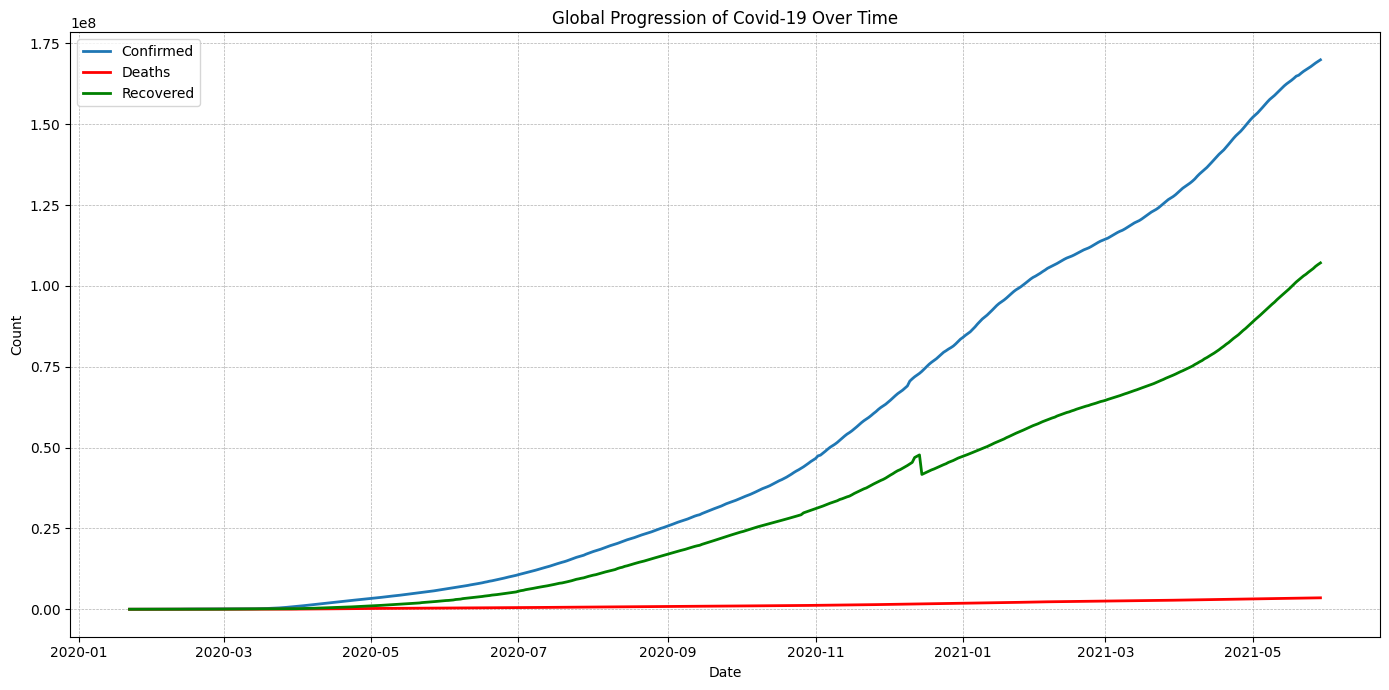

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by ObservationDate and sum up the cases for global progression
time_series_data = covid_data.groupby('ObservationDate').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum'
}).reset_index()

# Convert ObservationDate from string to datetime format for proper plotting
time_series_data['ObservationDate'] = pd.to_datetime(time_series_data['ObservationDate'])

# Plotting
plt.figure(figsize=(14, 7))
sns.lineplot(data=time_series_data, x='ObservationDate', y='Confirmed', label='Confirmed', lw=2)
sns.lineplot(data=time_series_data, x='ObservationDate', y='Deaths', label='Deaths', lw=2, color='red')
sns.lineplot(data=time_series_data, x='ObservationDate', y='Recovered', label='Recovered', lw=2, color='green')

plt.title('Global Progression of Covid-19 Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


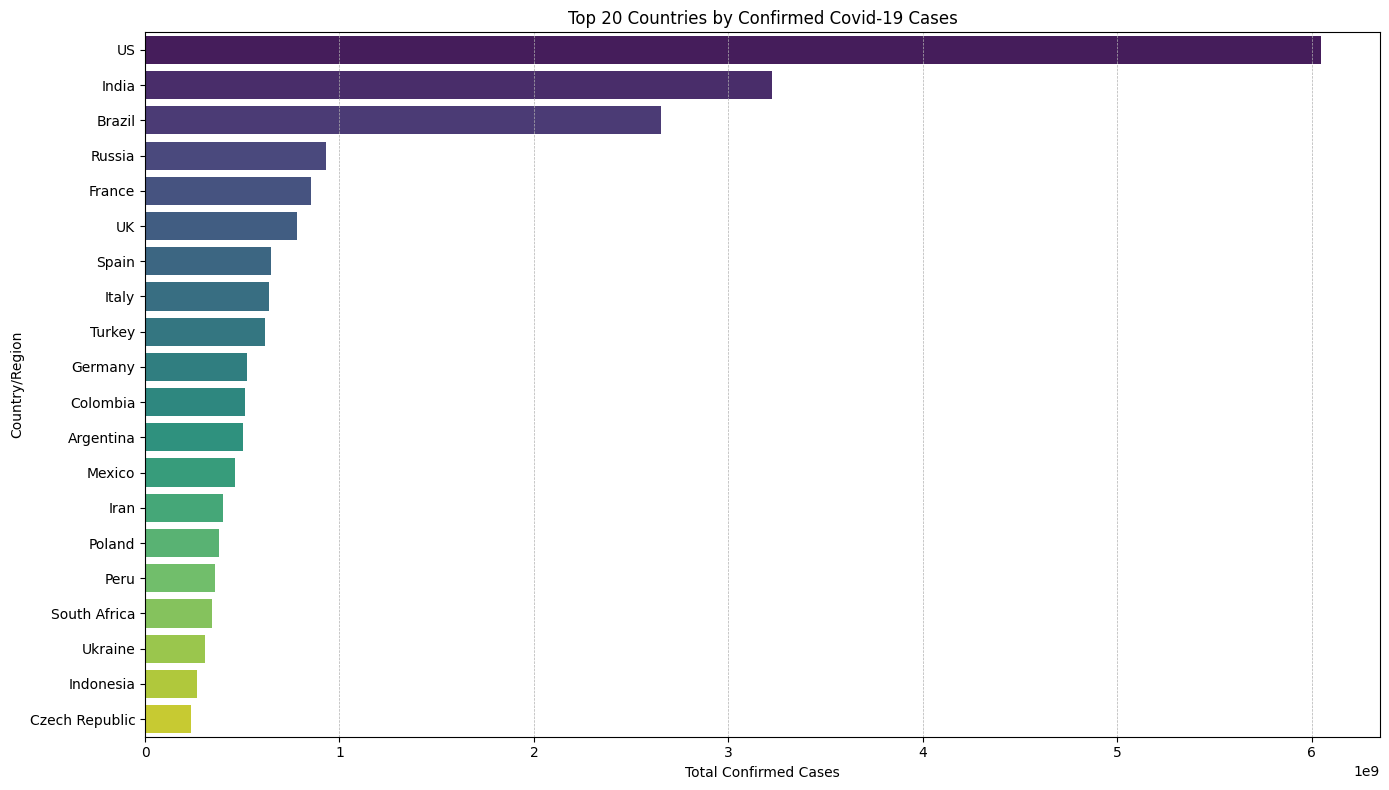

In [6]:
# Group by Country/Region and sum up the cases
country_data = covid_data.groupby('Country/Region').agg({
    'Confirmed': 'sum'
}).reset_index()

# Sort by Confirmed cases and get top 20 countries
top_countries = country_data.sort_values(by='Confirmed', ascending=False).head(20)

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(data=top_countries, x='Confirmed', y='Country/Region', palette='viridis')
plt.title('Top 20 Countries by Confirmed Covid-19 Cases')
plt.xlabel('Total Confirmed Cases')
plt.ylabel('Country/Region')
plt.grid(axis='x', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


#

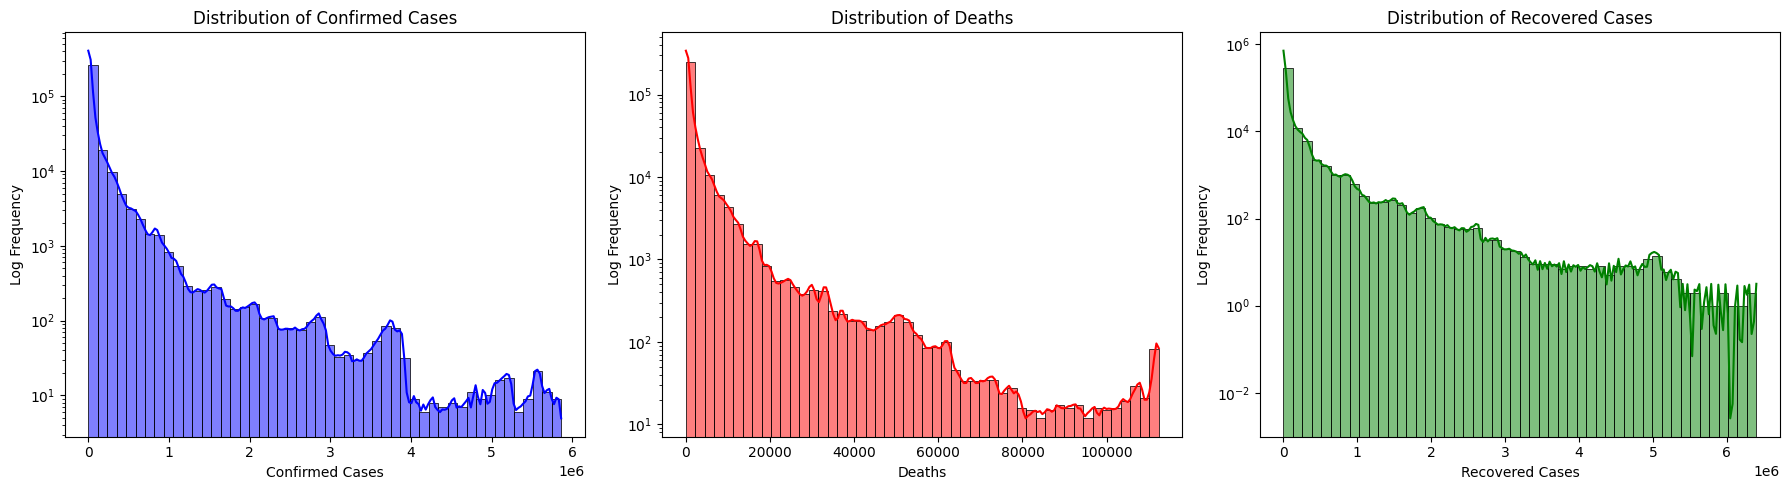

In [7]:
# Plotting histograms
plt.figure(figsize=(18, 5))

# For Confirmed cases
plt.subplot(1, 3, 1)
sns.histplot(data=covid_data, x='Confirmed', bins=50, color='blue', kde=True)
plt.yscale('log')
plt.title('Distribution of Confirmed Cases')
plt.xlabel('Confirmed Cases')
plt.ylabel('Log Frequency')

# For Deaths
plt.subplot(1, 3, 2)
sns.histplot(data=covid_data, x='Deaths', bins=50, color='red', kde=True)
plt.yscale('log')
plt.title('Distribution of Deaths')
plt.xlabel('Deaths')
plt.ylabel('Log Frequency')

# For Recovered
plt.subplot(1, 3, 3)
sns.histplot(data=covid_data, x='Recovered', bins=50, color='green', kde=True)
plt.yscale('log')
plt.title('Distribution of Recovered Cases')
plt.xlabel('Recovered Cases')
plt.ylabel('Log Frequency')

plt.tight_layout()
plt.show()


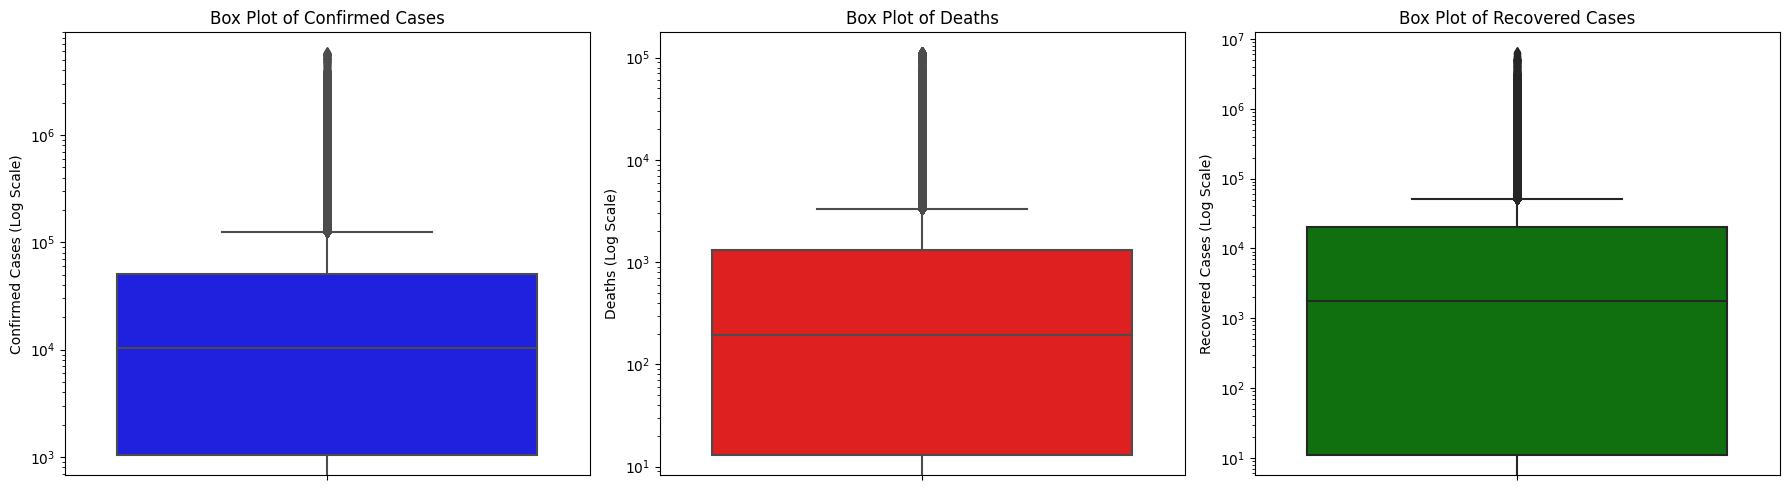

In [8]:
# Plotting box plots
plt.figure(figsize=(18, 5))

# Box plot for Confirmed cases
plt.subplot(1, 3, 1)
sns.boxplot(y=covid_data['Confirmed'], color='blue')
plt.yscale('log')
plt.title('Box Plot of Confirmed Cases')
plt.ylabel('Confirmed Cases (Log Scale)')

# Box plot for Deaths
plt.subplot(1, 3, 2)
sns.boxplot(y=covid_data['Deaths'], color='red')
plt.yscale('log')
plt.title('Box Plot of Deaths')
plt.ylabel('Deaths (Log Scale)')

# Box plot for Recovered
plt.subplot(1, 3, 3)
sns.boxplot(y=covid_data['Recovered'], color='green')
plt.yscale('log')
plt.title('Box Plot of Recovered Cases')
plt.ylabel('Recovered Cases (Log Scale)')

plt.tight_layout()
plt.show()


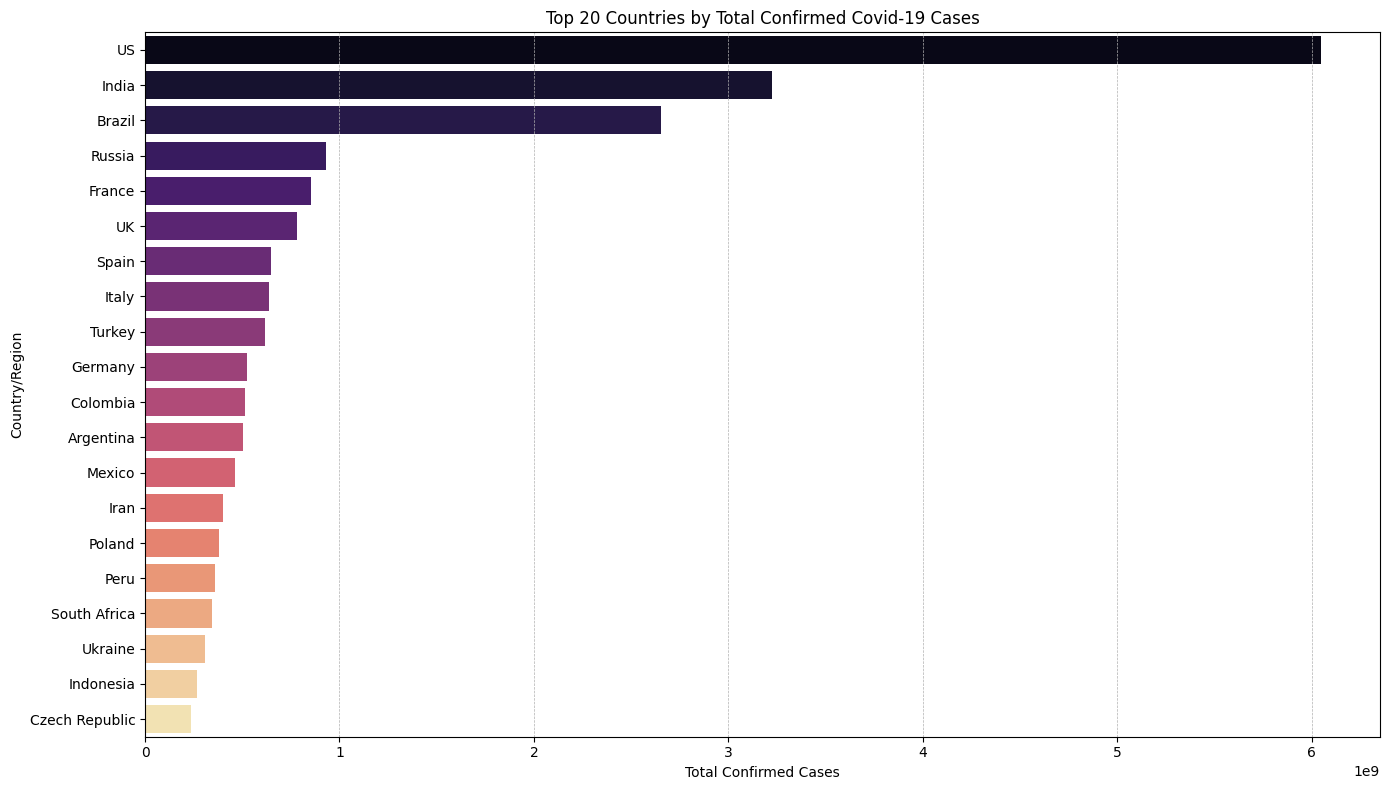

In [9]:
# Group by Country/Region and sum up the cases and deaths
country_totals = covid_data.groupby('Country/Region').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum'
}).reset_index()

# Top 20 countries by confirmed cases
top_confirmed_countries = country_totals.sort_values(by='Confirmed', ascending=False).head(20)

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(data=top_confirmed_countries, x='Confirmed', y='Country/Region', palette='magma')
plt.title('Top 20 Countries by Total Confirmed Covid-19 Cases')
plt.xlabel('Total Confirmed Cases')
plt.ylabel('Country/Region')
plt.grid(axis='x', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


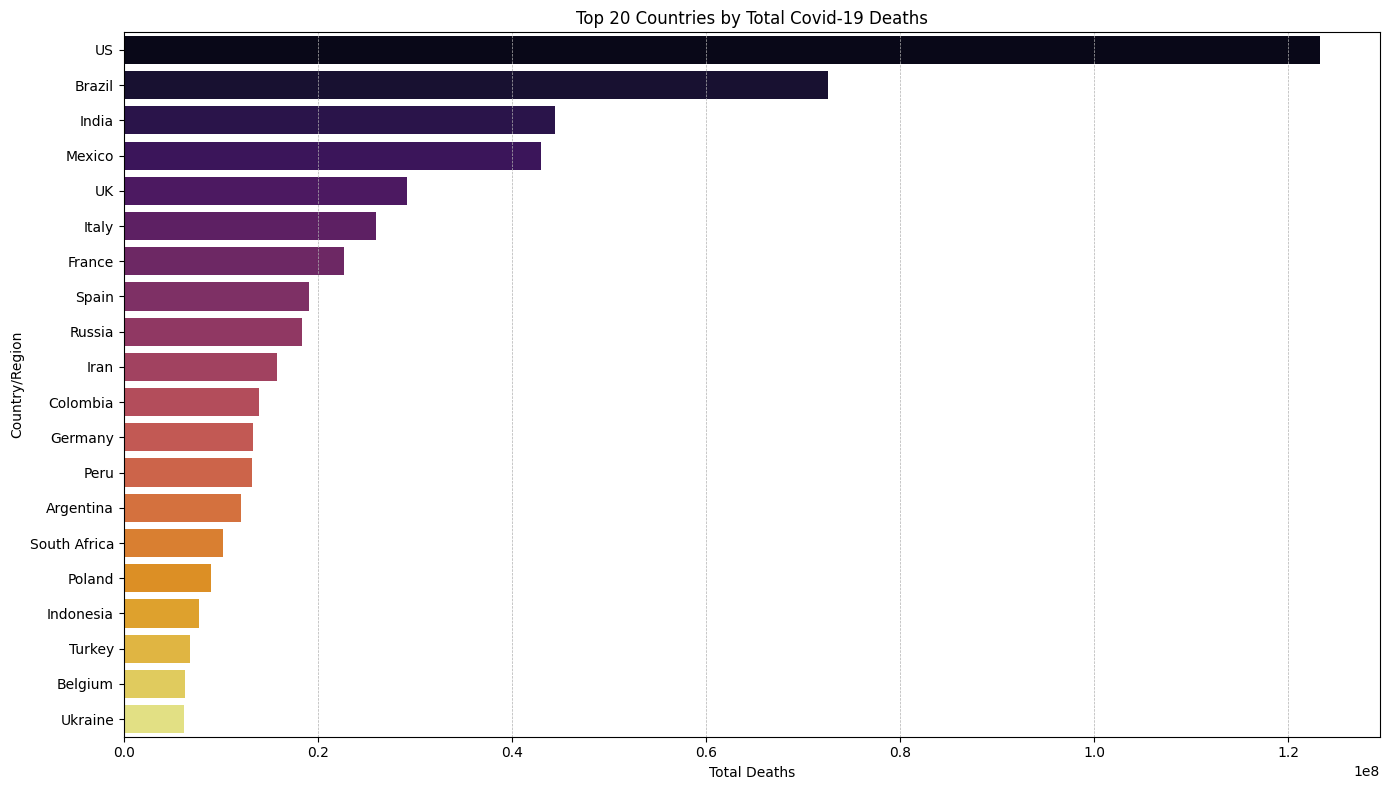

In [10]:
# Top 20 countries by deaths
top_death_countries = country_totals.sort_values(by='Deaths', ascending=False).head(20)

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(data=top_death_countries, x='Deaths', y='Country/Region', palette='inferno')
plt.title('Top 20 Countries by Total Covid-19 Deaths')
plt.xlabel('Total Deaths')
plt.ylabel('Country/Region')
plt.grid(axis='x', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


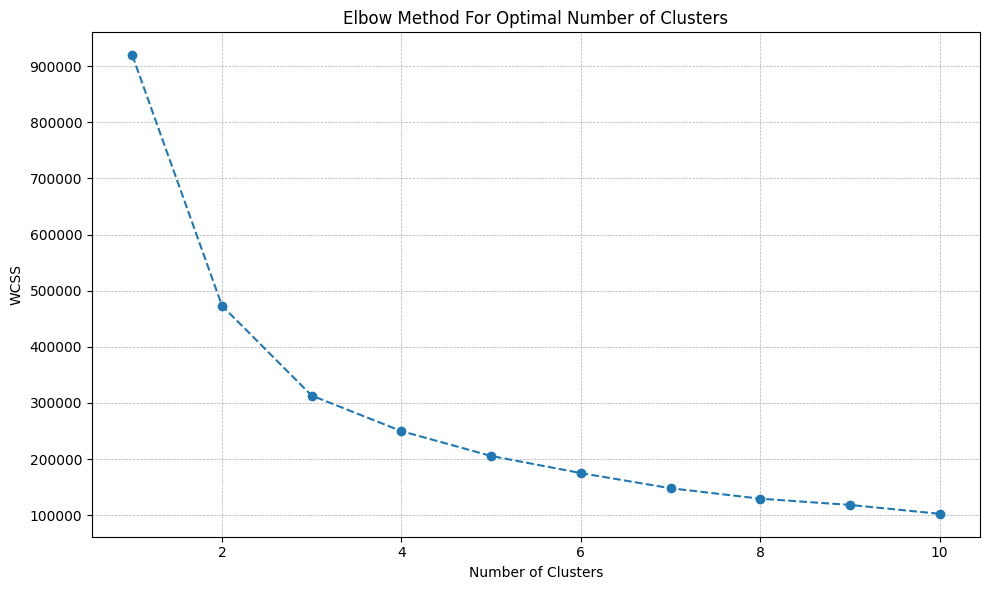

In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(covid_data[['Confirmed', 'Deaths', 'Recovered']])

# Determining the optimal number of clusters using the Elbow Method
wcss = []  # Within-Cluster-Sum-of-Squares
cluster_range = range(1, 11)  # We'll check for up to 10 clusters

for i in cluster_range:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


## Model Building with K-Means Clustering

In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(covid_data[['Confirmed', 'Deaths', 'Recovered']])

# Applying KMeans clustering with k=5
kmeans_final = KMeans(n_clusters=5, init='k-means++', random_state=42)
covid_data['Cluster'] = kmeans_final.fit_predict(scaled_data)


In [13]:
# Checking the number of data points in each cluster
cluster_counts = covid_data['Cluster'].value_counts().sort_index()
print(cluster_counts)

# Checking mean values for each cluster
cluster_means = covid_data.groupby('Cluster').mean()
print(cluster_means)


0    273338
1      5273
2      1296
3     25642
4       880
Name: Cluster, dtype: int64
                   SNo     Confirmed        Deaths     Recovered
Cluster                                                         
0        145668.347782  2.591703e+04    638.284871  1.410740e+04
1        230638.287313  8.025934e+05  16172.246539  8.206227e+05
2        244380.952932  2.201209e+06  49578.383488  2.176971e+06
3        209955.119257  3.682600e+05   9498.074331  1.716487e+05
4        245774.792045  3.000544e+06  64166.336364  5.126092e+04


<ipython-input-13-7f22cb897017>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = covid_data.groupby('Cluster').mean()


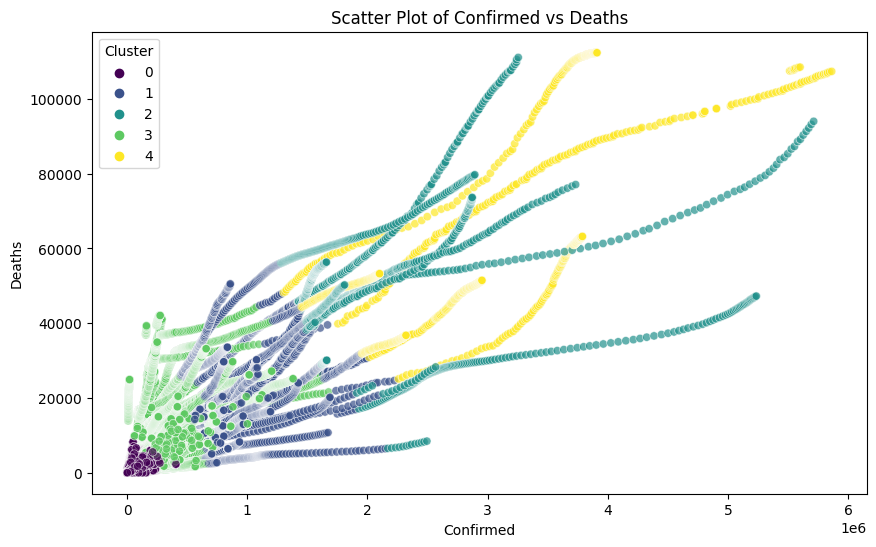

<ipython-input-14-f88eaafb0325>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=covid_data, x='Cluster', y='Confirmed', estimator=sum, ci=None, palette='viridis')


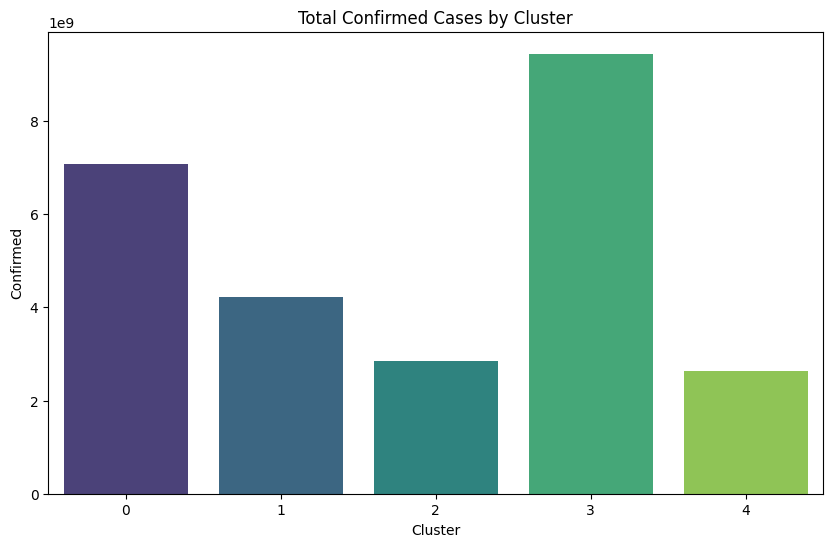

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of 'Confirmed' vs 'Deaths', colored by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=covid_data, x='Confirmed', y='Deaths', hue='Cluster', palette='viridis', alpha=0.7)
plt.title('Scatter Plot of Confirmed vs Deaths')
plt.show()

# Bar plot showing average 'Confirmed' cases for each cluster
plt.figure(figsize=(10, 6))
sns.barplot(data=covid_data, x='Cluster', y='Confirmed', estimator=sum, ci=None, palette='viridis')
plt.title('Total Confirmed Cases by Cluster')
plt.show()


## Outlier Detection

In [15]:
# Defining a function to detect outliers based on IQR
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Detecting outliers for 'Confirmed', 'Deaths', and 'Recovered' columns
outliers_confirmed = detect_outliers(covid_data, 'Confirmed')
outliers_deaths = detect_outliers(covid_data, 'Deaths')
outliers_recovered = detect_outliers(covid_data, 'Recovered')

len(outliers_confirmed), len(outliers_deaths), len(outliers_recovered)


(43977, 42102, 46462)

In [16]:
# Filling missing values in 'Province/State' column with 'Unknown'
covid_data['Province/State'].fillna('Unknown', inplace=True)

# Checking if there are any more missing values left in the dataset
missing_values = covid_data.isnull().sum()
missing_values


SNo                0
ObservationDate    0
Province/State     0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
Cluster            0
dtype: int64

In [17]:
# Convert 'ObservationDate' to datetime format
covid_data['ObservationDate'] = pd.to_datetime(covid_data['ObservationDate'])

# Extracting time-based features
covid_data['Month'] = covid_data['ObservationDate'].dt.month
covid_data['WeekOfYear'] = covid_data['ObservationDate'].dt.isocalendar().week
covid_data['DayOfWeek'] = covid_data['ObservationDate'].dt.dayofweek

# Computing active cases
covid_data['ActiveCases'] = covid_data['Confirmed'] - (covid_data['Deaths'] + covid_data['Recovered'])

# Displaying a sample of the dataset with new features
covid_data.sample(5)


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Cluster,Month,WeekOfYear,DayOfWeek,ActiveCases
177100,177101,2020-12-11,Stockholm,Sweden,2021-04-02 15:13:53,93383.0,2936.0,0.0,0,12,50,4,90447.0
19101,19102,2020-04-26,Anguilla,UK,2020-04-27 02:31:20,3.0,0.0,1.0,0,4,17,6,2.0
255304,255305,2021-03-24,Unknown,Saint Vincent and the Grenadines,2021-04-02 15:13:53,1703.0,10.0,1529.0,0,3,12,2,164.0
116094,116095,2020-09-21,Tennessee,US,2021-04-02 15:13:53,184409.0,2233.0,0.0,0,9,39,0,182176.0
264630,264631,2021-04-05,Chihuahua,Mexico,2021-04-06 04:20:32,46662.0,5609.0,0.0,0,4,14,0,41053.0


## Data Splitting and Linear Regression

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Data Preparation
features = ['Month', 'WeekOfYear', 'DayOfWeek', 'ActiveCases', 'Deaths', 'Recovered']
X = covid_data[features]
y = covid_data['Confirmed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 1.3187749324312943e-10


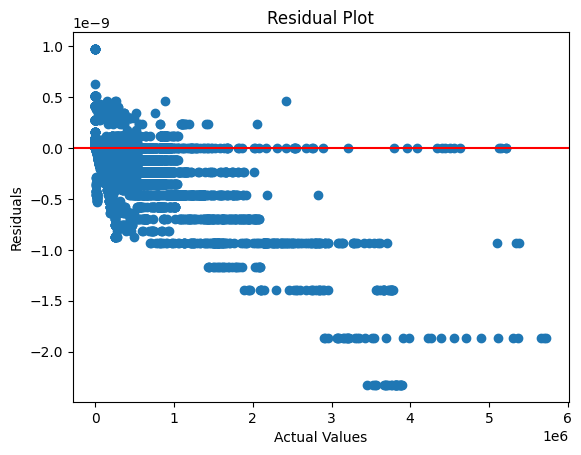

In [19]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


## Decision Tree Regression

In [20]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
y_pred_tree = tree_reg.predict(X_test)
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))


## Random Forest Regression

In [21]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)
y_pred_forest = forest_reg.predict(X_test)
rmse_forest = np.sqrt(mean_squared_error(y_test, y_pred_forest))


In [22]:
rmse_tree, rmse_forest

(3909.633129459089, 2283.9957360206995)

## XGBoost  Regression

In [23]:
! pip install xgboost
! pip install fbprophet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 45.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 68.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 72.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.1 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet


In [24]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_pred_xgb = xgb_reg.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))


In [25]:
rmse_xgb

32899.570940038604

## AutoML using Auto-sklearn

### Initial Set up

In [1]:
!pip install Cython==0.29.36
!pip uninstall scipy -y
!pip install scipy==1.9
!pip uninstall pyparsing -y
!pip install pyparsing==2.4
!pip uninstall scikit_learn -y

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 8.0 MB/s eta 0:00:00
  Attempting uninstall: Cython
    Found existing installation: Cython 3.0.4
    Uninstalling Cython-3.0.4:
      Successfully uninstalled Cython-3.0.4
Found existing installation: scipy 1.11.3
Uninstalling scipy-1.11.3:
  Successfully uninstalled scipy-1.11.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 MB 13.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
Found existing installation: pyparsing 3.1.1
Uninstalling pyparsing-3.1.1:
  Successfully uninstalled pyparsing-3.1.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 1.1

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2


In [1]:
!pip uninstall imbalanced-learn -y
!pip uninstall mlxtend -y
!pip uninstall yellowbrick -y

In [2]:
!pip install scikit-learn==0.24.2 --no-build-isolation

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 13.3 MB/s eta 0:00:00
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-learn: filename=scikit_learn-0.24.2-cp310-cp310-linux_x86_64.whl size=22231975 sha256=2c67021585a19efb3543d910c7c38ef43aed2d48db17ed8e788a8297c5f00e0b
  Stored in directory: /root/.cache/pip/wheels/13/a4/68/4e78865652fa14db4a162b491e5138565f97646f9e1f2ab8cc
Successfully built scikit-learn
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.10.0 requires scikit-learn>=1.2.2, but you have scikit-learn 0.24.2 which is incompatible.


In [3]:
!pip install auto-sklearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 34.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.9/260.9 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 3.9 MB/s eta 0:00:00
  Created wheel for auto-sklearn: filename=auto_sklearn-0.15.0-py3-none-any.whl size=6641936 sha256=6a71aad1bb08ffa2e3cfd7f53e4987187bc0df9df02caae7ff4b5d4ae1ad95ec
  Stored in directory: /root/.cache/pip/wheels/4d/0a/f9/8c1a06bcc36bc16b467b044b5bb03a90f92a5c5e6cd443414b
  Created wheel for pynisher: filename=pynisher-0.6.4-py3-none-any.whl

In [4]:
!pip uninstall scipy -y
!pip install scipy==1.9
!pip uninstall pyparsing -y
!pip install pyparsing==2.4


Found existing installation: scipy 1.9.0
Uninstalling scipy-1.9.0:
  Successfully uninstalled scipy-1.9.0
  Using cached scipy-1.9.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (43.9 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
Found existing installation: pyparsing 2.4.0
Uninstalling pyparsing-2.4.0:
  Successfully uninstalled pyparsing-2.4.0
  Using cached pyparsing-2.4.0-py2.py3-none-any.whl (62 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
httplib2 0.22.0 requires pyparsing!=3.0.0,!=3

### Autosklearn Regression phase

In [29]:
from autosklearn.regression import AutoSklearnRegressor


In [30]:
# Initialize the AutoSklearn regressor
# Here, time_left_for_this_task is the total time for the fit,
# per_run_time_limit is the time for each model, and memory_limit is the memory allocated in MB.
auto_regressor = AutoSklearnRegressor(
    time_left_for_this_task=120,  # seconds
    per_run_time_limit=30,  # seconds
    memory_limit=4096  # MB
)

In [31]:
# Fit the regressor to the training data
# X_train and y_train are your features and target variable respectively
auto_regressor.fit(X_train, y_train)


[WARNING] [2023-10-31 23:59:57,301:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2023-11-01 00:00:28,555:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2023-11-01 00:00:59,828:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2023-11-01 00:01:13,114:Client-EnsembleBuilder] No runs were available to build an ensemble from


AutoSklearnRegressor(ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>,
                     memory_limit=4096, per_run_time_limit=30,
                     time_left_for_this_task=120)

In [32]:
# Evaluate the performance of the model
# X_test and y_test are your features and target variable for the test set respectively
score = auto_regressor.score(X_test, y_test)
print(f"Model R^2 score: {score}")


Model R^2 score: -7.352074659516816e-06


In [36]:
# Save the model
import joblib
joblib.dump(auto_regressor, 'auto_sklearn_regressor.joblib')

# Load the model
auto_regressor_loaded = joblib.load('auto_sklearn_regressor.joblib')


## AutoEDA using Sweetviz

In [45]:
!pip install sweetviz

  Using cached sweetviz-2.2.1-py3-none-any.whl (15.1 MB)


In [47]:
import pandas as pd
import numpy as np

# Reload the dataset
covid_data = pd.read_csv("covid_19_data.csv")

# Handle missing values and convert date
covid_data['Province/State'].fillna('Unknown', inplace=True)
covid_data['ObservationDate'] = pd.to_datetime(covid_data['ObservationDate'])

# Dropping unnecessary columns
covid_data.drop(columns=['SNo', 'Last Update'], inplace=True)

# Calculate Active Cases, Mortality Rate, and Recovery Rate
covid_data['ActiveCases'] = covid_data['Confirmed'] - (covid_data['Deaths'] + covid_data['Recovered'])
covid_data['MortalityRate'] = covid_data['Deaths'] / covid_data['Confirmed'].replace(0, np.nan)
covid_data['RecoveryRate'] = covid_data['Recovered'] / covid_data['Confirmed'].replace(0, np.nan)

# Replace infinities and NaNs
covid_data.replace([np.inf, -np.inf], np.nan, inplace=True)
covid_data.fillna(0, inplace=True)

# Confirm the data types
covid_data.dtypes



ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Confirmed                 float64
Deaths                    float64
Recovered                 float64
ActiveCases               float64
MortalityRate             float64
RecoveryRate              float64
dtype: object

In [48]:
import sweetviz as sv

In [49]:
# Assuming covid_data is your cleaned DataFrame
report = sv.analyze(covid_data)
report.show_html('COVID19_Sweetviz_Report.html')


                                             |          | [  0%]   00:00 -> (? left)

Report COVID19_Sweetviz_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
